In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('file_1.csv')

In [ ]:
df.head()

,time,heartRate
0,13:00,62
1,13:01,69
2,13:02,69
3,13:03,69
4,13:04,70


In [ ]:
df.tail()

,time,heartRate
116,14:56,82
117,14:57,82
118,14:58,82
119,14:59,81
120,15:00,81


In [ ]:
## Cleaning up the data
df.columns=["Time","HeartRate"]
df.head()

,Time,HeartRate
0,13:00,62
1,13:01,69
2,13:02,69
3,13:03,69
4,13:04,70


In [ ]:
# Convert time into Datetime
df['Time']=pd.to_datetime(df['Time'])

In [ ]:
df.head()

,Time,HeartRate
0,2022-10-17 13:00:00,62
1,2022-10-17 13:01:00,69
2,2022-10-17 13:02:00,69
3,2022-10-17 13:03:00,69
4,2022-10-17 13:04:00,70


In [ ]:
df.set_index('Time',inplace=True)

In [ ]:
df.head()

,HeartRate
Time,
2022-10-17 13:00:00,62
2022-10-17 13:01:00,69
2022-10-17 13:02:00,69
2022-10-17 13:03:00,69
2022-10-17 13:04:00,70


Step 2: Visualize the Data

In [ ]:
import matplotlib.pyplot as plt

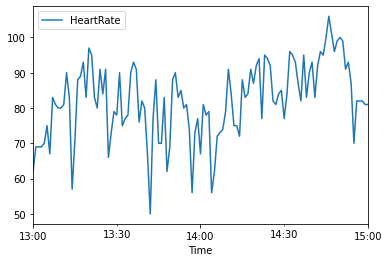

In [ ]:
df.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
passing_data=adfuller(df['HeartRate'])

In [ ]:
def adf_test(sales):
    result=adfuller(sales)
    labels = ['Test parameters', 'p-value','#Lags in the datase','Data points used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")
    

In [ ]:
adf_test(df['HeartRate'])

Test parameters : -3.587722330343093
p-value : 0.006000135418084747
#Lags in the datase : 2
Data points used : 118
Dataset is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

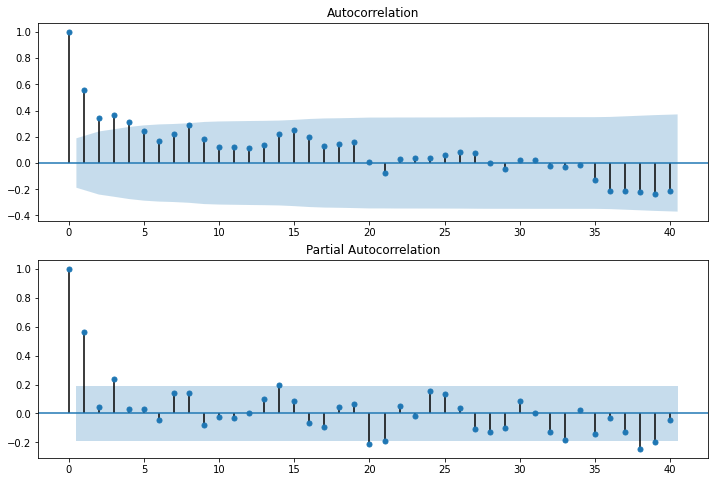

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['HeartRate'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['HeartRate'].iloc[13:],lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['HeartRate'],order=(1,1,1))
arima_model=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency T will be use

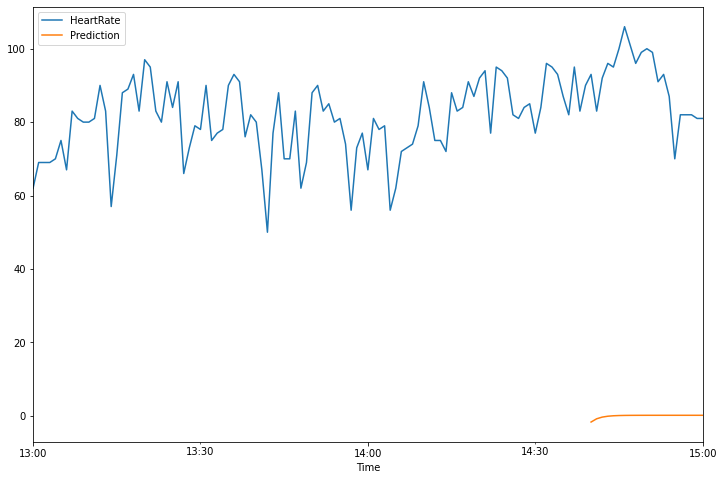

In [ ]:
df['Prediction']=arima_model.predict(start=100,end=120,dynamic=True)
df[['HeartRate','Prediction']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['HeartRate'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
sarima_model=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


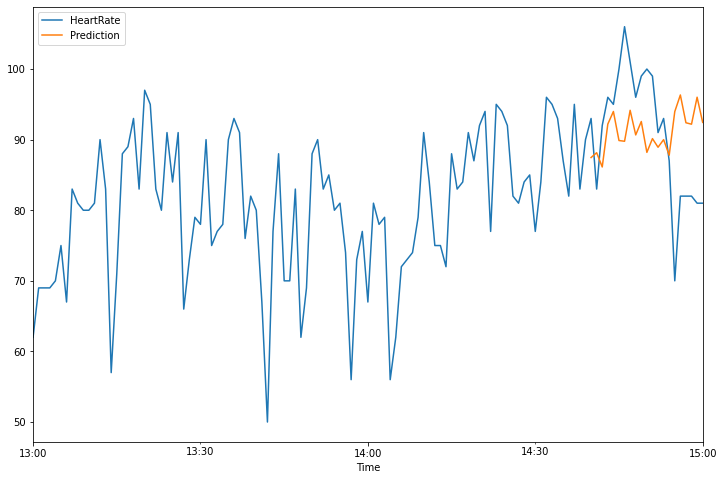

In [ ]:
df['Prediction']=sarima_model.predict(start=100,end=120,dynamic=True)
df[['HeartRate','Prediction']].plot(figsize=(12,8))

prophet
LSTM